# FINAL PROJECT POL CUNYAT
## Análisis de un DataSet de pacientes del Covid-19

### 1. Importamos las librerías necesarias, así como el dataset que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy.stats import stats
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [2]:
data = pd.read_csv('Covid Data.csv')

In [3]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


### 2. Convertimos la columna 'DATE_DIED' en 'PATIENT_DIED' (nos sirve para saber si el paciente murió o no). También eliminamos columnas que nos empeoran el modelo

El valor 97 en la columna pregnant corresponde a hombres que no están embarazados. Dado que los hombres no se pueden quedar embarazados (en principio) vamos a convertir este valor en un 2 (significa que NO está embarazado)

In [4]:
data['PREGNANT'].replace(97, 2, inplace=True)

In [5]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

Convertimos la columna 'PATIENT_DIED' en integers para poderla usar mejor

In [6]:
def f(row):
    if row['DATE_DIED'] == '9999-99-99':
        val = '2'
    else:
        val = '1'
    return val

In [7]:
data['PATIENT_DIED'] = data.apply(f, axis=1)

In [8]:
data['PATIENT_DIED'] = data['PATIENT_DIED'].astype(int)

In [9]:
data.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
PATIENT_DIED            0
dtype: int64

In [10]:
data.drop(['DATE_DIED', 'COPD', 'ICU', 'CLASIFFICATION_FINAL'],axis =1, inplace = True)

In [11]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,PATIENT_DIED
0,2,1,1,1,97,1,65,2,2,2,2,1,2,2,2,2,2,1
1,2,1,2,1,97,1,72,2,2,2,2,1,2,2,1,1,2,1
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,1
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,1
4,2,1,2,1,97,2,68,2,1,2,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,2,2,2,2,2,2,2,2,2,2,2
1048571,1,13,2,2,2,2,51,2,2,2,2,1,2,2,2,2,2,2
1048572,2,13,2,1,97,2,55,2,2,2,2,2,2,2,2,2,2,2
1048573,2,13,2,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2


### 3. Eliminamos posibles NaN del dataset

In [12]:
data = data.dropna()

In [13]:
data.shape

(1048575, 18)

In [14]:
data = data[data['AGE']<= 80]
#data = data[data['PATIENT_TYPE']<= 2]
#data = data[data['INTUBED']>= 1]

### 4. Hacemos una matriz de correlaciones

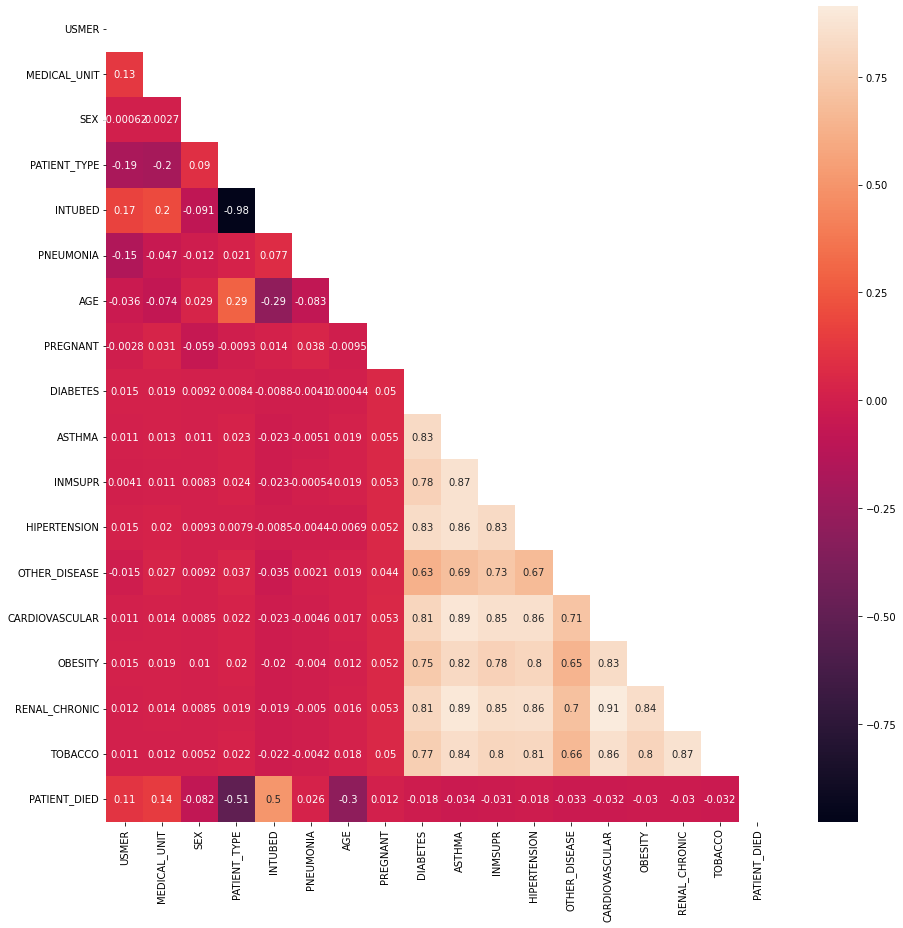

In [15]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (15, 15))
ax = sn.heatmap(correlations_matrix, mask = mask, annot = True)
plt.show()

In [16]:
data['PNEUMONIA'].unique()

array([ 1,  2, 99], dtype=int64)

In [17]:
num_cols = 'AGE'

In [18]:
cat_cols = [col for col in data.columns if col not in num_cols and col != "PATIENT_DIED"]

In [19]:
categoricals = data[cat_cols]
numericals =  data[num_cols]

In [20]:
categoricals.astype(object)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,PREGNANT,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,2,1,1,1,97,1,2,2,2,2,1,2,2,2,2,2
1,2,1,2,1,97,1,2,2,2,2,1,2,2,1,1,2
2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2
3,2,1,1,1,97,2,2,2,2,2,2,2,2,2,2,2
4,2,1,2,1,97,2,2,1,2,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,2,2,2,2,2,2,2,2,2,2
1048571,1,13,2,2,2,2,2,2,2,2,1,2,2,2,2,2
1048572,2,13,2,1,97,2,2,2,2,2,2,2,2,2,2,2
1048573,2,13,2,1,97,2,2,2,2,2,2,2,2,2,2,2


In [21]:
categoricals_encoded = pd.get_dummies(categoricals.astype(object), drop_first=True)

C:\Users\EL814WT\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [22]:
categoricals_encoded.head()

,USMER_2,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,...,OTHER_DISEASE_2,OTHER_DISEASE_98,CARDIOVASCULAR_2,CARDIOVASCULAR_98,OBESITY_2,OBESITY_98,RENAL_CHRONIC_2,RENAL_CHRONIC_98,TOBACCO_2,TOBACCO_98
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [23]:
data_final = pd.DataFrame(numericals).join(categoricals_encoded).join(pd.DataFrame(data['PATIENT_DIED']))

In [24]:
data_final.head(2)

,AGE,USMER_2,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,...,OTHER_DISEASE_98,CARDIOVASCULAR_2,CARDIOVASCULAR_98,OBESITY_2,OBESITY_98,RENAL_CHRONIC_2,RENAL_CHRONIC_98,TOBACCO_2,TOBACCO_98,PATIENT_DIED
0,65,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1,72,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


### 5. Realización del modelo

In [25]:
from sklearn.model_selection import train_test_split as tts

x = data_final.drop(columns = ['PATIENT_DIED'])
y = data_final['PATIENT_DIED']

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=42)
print(x.shape)
print(y.shape)

(1029291, 41)
(1029291,)


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred_rfc = rfc.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test, y_pred_rfc)

array([[  9995,  10781],
       [  6106, 281906]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.62      0.48      0.54     20776
           2       0.96      0.98      0.97    288012

    accuracy                           0.95    308788
   macro avg       0.79      0.73      0.76    308788
weighted avg       0.94      0.95      0.94    308788



In [33]:
data.to_csv('ProjectBI.csv')

In [34]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,PATIENT_DIED
0,2,1,1,1,97,1,65,2,2,2,2,1,2,2,2,2,2,1
1,2,1,2,1,97,1,72,2,2,2,2,1,2,2,1,1,2,1
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,1
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,1
4,2,1,2,1,97,2,68,2,1,2,2,1,2,2,2,2,2,1
